In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [173]:
file = pd.read_csv("C:/Users/hbsss/OneDrive/Documents/게임캡스톤디자인/results_250512.csv")

In [175]:
file.shape

(225, 22)

In [177]:
file

,killWeight,collectWeight,jumpWeight,timeWeight,winWeight,loseWeight,completion,remaining_time,mariostate,total_kill,...,shell_kill,hurts,question_blocks,bump_bricks,destroyed_bricks,coins,tile_coins,mushrooms,fireflowers,jumps
0,-3,-3,-3,-3,-10,10,1.000000,36.8,0.8,5.8,...,0.6,2.2,1.6,2.8,2.8,7.2,0,0,0,23.6
1,-3,-3,-3,-1,-10,10,1.000000,36.6,1.0,6.0,...,0.4,0.0,1.8,2.4,2.4,6.8,0,0,0,23.8
2,-3,-3,-3,0,-10,10,0.937650,37.6,0.0,8.4,...,0.4,10.8,3.0,0.0,0.0,9.4,0,0,0,19.6
3,-3,-3,-1,-3,-10,10,1.000000,36.6,1.0,4.2,...,0.0,0.0,2.0,2.4,2.4,7.8,0,0,0,24.8
4,-3,-3,-1,-1,-10,10,1.000000,36.4,0.8,6.2,...,1.0,2.2,2.2,2.2,2.2,8.0,0,0,0,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,3,3,-1,-1,-10,10,1.000000,36.2,1.0,0.8,...,0.0,0.0,0.8,3.2,3.2,0.4,0,0,0,28.4
221,3,3,-1,0,-10,10,0.928380,38.0,0.2,2.8,...,0.0,10.6,0.0,1.2,1.2,1.0,0,0,0,21.4
222,3,3,0,-3,-10,10,1.000000,37.8,1.0,0.6,...,0.0,0.0,0.2,1.6,1.6,0.2,0,0,0,23.4
223,3,3,0,-1,-10,10,1.000000,37.8,1.0,0.6,...,0.0,0.0,0.2,1.6,1.6,0.2,0,0,0,23.4


In [197]:
file['id'] = file.index+1

In [199]:
file

,killWeight,collectWeight,jumpWeight,timeWeight,winWeight,loseWeight,completion,remaining_time,mariostate,total_kill,...,hurts,question_blocks,bump_bricks,destroyed_bricks,coins,tile_coins,mushrooms,fireflowers,jumps,id
id,,,,,,,,,,,,,,,,,,,,,
1,-3,-3,-3,-3,-10,10,1.000000,36.8,0.8,5.8,...,2.2,1.6,2.8,2.8,7.2,0,0,0,23.6,2
2,-3,-3,-3,-1,-10,10,1.000000,36.6,1.0,6.0,...,0.0,1.8,2.4,2.4,6.8,0,0,0,23.8,3
3,-3,-3,-3,0,-10,10,0.937650,37.6,0.0,8.4,...,10.8,3.0,0.0,0.0,9.4,0,0,0,19.6,4
4,-3,-3,-1,-3,-10,10,1.000000,36.6,1.0,4.2,...,0.0,2.0,2.4,2.4,7.8,0,0,0,24.8,5
5,-3,-3,-1,-1,-10,10,1.000000,36.4,0.8,6.2,...,2.2,2.2,2.2,2.2,8.0,0,0,0,24.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,3,3,-1,-1,-10,10,1.000000,36.2,1.0,0.8,...,0.0,0.8,3.2,3.2,0.4,0,0,0,28.4,222
222,3,3,-1,0,-10,10,0.928380,38.0,0.2,2.8,...,10.6,0.0,1.2,1.2,1.0,0,0,0,21.4,223
223,3,3,0,-3,-10,10,1.000000,37.8,1.0,0.6,...,0.0,0.2,1.6,1.6,0.2,0,0,0,23.4,224


In [201]:
df = file[file['completion'] > 0.1]
df.set_index("id", inplace = True)
df.head()

,killWeight,collectWeight,jumpWeight,timeWeight,winWeight,loseWeight,completion,remaining_time,mariostate,total_kill,...,shell_kill,hurts,question_blocks,bump_bricks,destroyed_bricks,coins,tile_coins,mushrooms,fireflowers,jumps
id,,,,,,,,,,,,,,,,,,,,,
2,-3,-3,-3,-3,-10,10,1.00000,36.8,0.8,5.8,...,0.6,2.2,1.6,2.8,2.8,7.2,0,0,0,23.6
3,-3,-3,-3,-1,-10,10,1.00000,36.6,1.0,6.0,...,0.4,0.0,1.8,2.4,2.4,6.8,0,0,0,23.8
4,-3,-3,-3,0,-10,10,0.93765,37.6,0.0,8.4,...,0.4,10.8,3.0,0.0,0.0,9.4,0,0,0,19.6
5,-3,-3,-1,-3,-10,10,1.00000,36.6,1.0,4.2,...,0.0,0.0,2.0,2.4,2.4,7.8,0,0,0,24.8
6,-3,-3,-1,-1,-10,10,1.00000,36.4,0.8,6.2,...,1.0,2.2,2.2,2.2,2.2,8.0,0,0,0,24.6


In [203]:
file.set_index("id", inplace =True)
file.head()

,killWeight,collectWeight,jumpWeight,timeWeight,winWeight,loseWeight,completion,remaining_time,mariostate,total_kill,...,shell_kill,hurts,question_blocks,bump_bricks,destroyed_bricks,coins,tile_coins,mushrooms,fireflowers,jumps
id,,,,,,,,,,,,,,,,,,,,,
2,-3,-3,-3,-3,-10,10,1.00000,36.8,0.8,5.8,...,0.6,2.2,1.6,2.8,2.8,7.2,0,0,0,23.6
3,-3,-3,-3,-1,-10,10,1.00000,36.6,1.0,6.0,...,0.4,0.0,1.8,2.4,2.4,6.8,0,0,0,23.8
4,-3,-3,-3,0,-10,10,0.93765,37.6,0.0,8.4,...,0.4,10.8,3.0,0.0,0.0,9.4,0,0,0,19.6
5,-3,-3,-1,-3,-10,10,1.00000,36.6,1.0,4.2,...,0.0,0.0,2.0,2.4,2.4,7.8,0,0,0,24.8
6,-3,-3,-1,-1,-10,10,1.00000,36.4,0.8,6.2,...,1.0,2.2,2.2,2.2,2.2,8.0,0,0,0,24.6


In [635]:
df = file.iloc[:, 6:]
df

,completion,remaining_time,mariostate,total_kill,stomp_kill,fire_kill,shell_kill,hurts,question_blocks,bump_bricks,destroyed_bricks,coins,tile_coins,mushrooms,fireflowers,jumps
id,,,,,,,,,,,,,,,,
2,1.000000,36.8,0.8,5.8,4.8,0,0.6,2.2,1.6,2.8,2.8,7.2,0,0,0,23.6
3,1.000000,36.6,1.0,6.0,5.2,0,0.4,0.0,1.8,2.4,2.4,6.8,0,0,0,23.8
4,0.937650,37.6,0.0,8.4,7.8,0,0.4,10.8,3.0,0.0,0.0,9.4,0,0,0,19.6
5,1.000000,36.6,1.0,4.2,3.8,0,0.0,0.0,2.0,2.4,2.4,7.8,0,0,0,24.8
6,1.000000,36.4,0.8,6.2,4.8,0,1.0,2.2,2.2,2.2,2.2,8.0,0,0,0,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1.000000,36.2,1.0,0.8,0.6,0,0.0,0.0,0.8,3.2,3.2,0.4,0,0,0,28.4
223,0.928380,38.0,0.2,2.8,2.6,0,0.0,10.6,0.0,1.2,1.2,1.0,0,0,0,21.4
224,1.000000,37.8,1.0,0.6,0.4,0,0.0,0.0,0.2,1.6,1.6,0.2,0,0,0,23.4


In [637]:
df.shape


(225, 16)

In [639]:
df = df.iloc[:, [ 3,7, 11,15]]

In [641]:
df.head()

,total_kill,hurts,coins,jumps
id,,,,
2,5.8,2.2,7.2,23.6
3,6.0,0.0,6.8,23.8
4,8.4,10.8,9.4,19.6
5,4.2,0.0,7.8,24.8
6,6.2,2.2,8.0,24.6


In [643]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)
df_scaled.shape
df_scaled.head()

,total_kill,hurts,coins,jumps
0,0.432836,0.169231,0.654545,0.316667
1,0.447761,0.000000,0.618182,0.325000
2,0.626866,0.830769,0.854545,0.150000
3,0.313433,0.000000,0.709091,0.366667
4,0.462687,0.169231,0.727273,0.358333


In [645]:
df_scaled = df_scaled.dropna()

In [647]:
df_scaled

,total_kill,hurts,coins,jumps
0,0.432836,0.169231,0.654545,0.316667
1,0.447761,0.000000,0.618182,0.325000
2,0.626866,0.830769,0.854545,0.150000
3,0.313433,0.000000,0.709091,0.366667
4,0.462687,0.169231,0.727273,0.358333
...,...,...,...,...
220,0.059701,0.000000,0.036364,0.516667
221,0.208955,0.815385,0.090909,0.225000
222,0.044776,0.000000,0.018182,0.308333
223,0.044776,0.000000,0.018182,0.308333


In [649]:
df_scaled.shape

(225, 4)

In [45]:
from sklearn.preprocessing import QuantileTransformer

# uniform 또는 normal 중 택1
scaler = QuantileTransformer(output_distribution='normal', random_state=0)
quantile = scaler.fit_transform(df)

# DataFrame으로 다시 변환
df_quantile = pd.DataFrame(quantile, columns=df.columns)
df_quantile.head()

C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (227). n_quantiles is set to n_samples.
  warnings.warn(


,completion,kill,coins,jumps
0,5.199338,0.901624,0.695526,0.315723
1,5.199338,0.416572,0.586526,0.509189
2,5.199338,1.469885,1.806781,-0.257931
3,5.199338,0.061040,1.006533,0.573403
4,5.199338,0.805807,1.083107,0.640075


In [471]:
df_test = df.iloc[:, 6:]
df_test = df_test.iloc[:, [0,2,3]]
df_test.head()

,completion,kill,coins
id,,,
1,1.000,5.4,7.2
2,1.000,6.2,7.6
3,0.999,6.2,7.6
4,0.999,6.2,7.6
5,0.218,1.6,2.6


In [395]:
from sklearn.preprocessing import QuantileTransformer

# uniform 또는 normal 중 택1
scaler = QuantileTransformer(output_distribution='normal', random_state=0)
quantile = scaler.fit_transform(df_test)

# DataFrame으로 다시 변환
df_quantile = pd.DataFrame(quantile, columns=df_test.columns)
df_quantile.head()

C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (48). n_quantiles is set to n_samples.
  warnings.warn(


,kill,coins,remaining_time,jumps
0,1.041007,1.087999,1.614666,-0.297667
1,5.199338,5.199338,1.371520,-0.242348
2,5.199338,5.199338,-5.199338,1.245996
3,5.199338,5.199338,-5.199338,1.371520
4,0.592985,0.834046,-0.187761,0.530530


In [413]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
robust = scaler.fit_transform(df_test)  # X는 DataFrame 또는 ndarray

# DataFrame으로 다시 변환 (원래 컬럼 유지)
import pandas as pd
df_robust = pd.DataFrame(robust, columns=df_test.columns)
df_robust.head()

,kill,coins,remaining_time,jumps
0,2.875,2.367347,4.741379,-0.198265
1,3.375,2.530612,4.672414,-0.190830
2,3.375,2.530612,-1.603448,0.636927
3,3.375,2.530612,-1.603448,0.641884
4,0.500,0.489796,-0.844828,0.517968


In [481]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(data=scaler.fit_transform(df_test), columns=df_test.columns)
df_scaled.shape
df_scaled.head()

,completion,kill,coins
0,1.000000,0.866667,0.947368
1,1.000000,1.000000,1.000000
2,0.998844,1.000000,1.000000
3,0.998844,1.000000,1.000000
4,0.095954,0.233333,0.342105


In [651]:
kmeans = KMeans(n_clusters =7, n_init = 8)
kmeans.fit(df_scaled)

C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7, n_init=8)

In [653]:
labels = kmeans.labels_
print(kmeans.labels_)

[6 6 3 6 6 3 6 6 3 6 6 3 6 6 3 6 6 3 6 6 5 6 6 5 2 2 2 2 2 5 0 2 5 0 0 2 2
 2 5 0 2 5 2 0 2 6 6 3 6 6 3 6 6 3 6 6 3 6 6 3 6 6 3 6 6 5 6 6 5 2 2 2 2 2
 5 0 2 2 0 0 2 2 2 5 0 2 5 0 0 2 6 6 3 6 6 3 6 6 6 6 6 3 6 6 3 6 6 6 6 6 5
 6 6 5 2 2 4 4 4 5 2 2 5 0 0 4 4 4 5 2 4 5 0 0 2 1 1 3 1 1 3 1 1 3 1 1 3 1
 1 3 1 1 3 4 4 5 1 4 5 4 4 4 4 4 5 4 4 5 4 4 4 4 4 5 4 4 5 0 0 4 1 1 3 1 1
 3 1 1 3 1 1 3 1 1 3 1 1 1 4 4 5 1 1 5 4 4 4 4 4 5 4 4 5 4 4 4 4 4 5 4 4 5
 4 4 4]


In [659]:
df_scaled['target'] = labels
df_scaled

,total_kill,hurts,coins,jumps,target
0,0.432836,0.169231,0.654545,0.316667,6
1,0.447761,0.000000,0.618182,0.325000,6
2,0.626866,0.830769,0.854545,0.150000,3
3,0.313433,0.000000,0.709091,0.366667,6
4,0.462687,0.169231,0.727273,0.358333,6
...,...,...,...,...,...
220,0.059701,0.000000,0.036364,0.516667,4
221,0.208955,0.815385,0.090909,0.225000,5
222,0.044776,0.000000,0.018182,0.308333,4
223,0.044776,0.000000,0.018182,0.308333,4


In [669]:
print(sorted(kmeans.labels_,reverse = True))

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [671]:
from collections import Counter
cluster_counts = Counter(sorted(kmeans.labels_, reverse = True))

for cluster_id in sorted(cluster_counts.keys()):
    print(f"클러스터 {cluster_id}: {cluster_counts[cluster_id]}개")

클러스터 0: 17개
클러스터 1: 28개
클러스터 2: 30개
클러스터 3: 27개
클러스터 4: 44개
클러스터 5: 29개
클러스터 6: 50개


In [507]:
distance_df = pd.DataFrame(kmeans.transform(df_scaled),columns = ["c0","c1","c2","c3","c4"])
print(distance_df)

          c0        c1        c2        c3        c4
0   1.482659  0.107510  1.174409  0.783775  0.867624
1   1.584402  0.035841  1.304139  0.917045  0.915081
2   1.583687  0.035841  1.304139  0.917045  0.915081
3   1.583687  0.035841  1.304139  0.917045  0.915081
4   0.250101  1.330308  0.954458  1.112496  1.191581
5   0.269228  1.340413  1.003793  1.175466  1.182969
6   0.187992  1.457559  1.014965  1.164840  1.332151
7   0.269228  1.340413  1.003793  1.175466  1.182969
8   0.177680  1.701654  0.999465  1.393675  1.388914
9   0.177680  1.701654  0.999465  1.393675  1.388914
10  0.177680  1.701654  0.999465  1.393675  1.388914
11  0.177680  1.701654  0.999465  1.393675  1.388914
12  1.319686  0.907895  0.883358  1.257311  0.006604
13  1.318439  0.881579  0.883946  1.238722  0.019745
14  1.318827  0.907895  0.883358  1.257311  0.006604
15  1.318827  0.907895  0.883358  1.257311  0.006604
16  0.210834  1.414582  1.027989  1.235226  1.228363
17  0.241820  1.381789  1.030207  1.198109  1.

In [657]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)
centroids['clusters'] = ['Cluster {}'.format(i) for i in
                         centroids.index]
print(centroids)

   total_kill     hurts     coins     jumps   clusters
0    0.355575  0.009955  0.034225  0.938235  Cluster 0
1    0.060235  0.015385  0.578571  0.473810  Cluster 1
2    0.520398  0.073333  0.093939  0.219444  Cluster 2
3    0.526258  0.564672  0.905724  0.298148  Cluster 3
4    0.077001  0.034965  0.059091  0.293182  Cluster 4
5    0.495111  0.552785  0.180564  0.175287  Cluster 5
6    0.380299  0.047692  0.601818  0.302167  Cluster 6


In [511]:
print(kmeans.inertia_)

1.1776301500725974


In [233]:
!pip install yellowbrick

C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

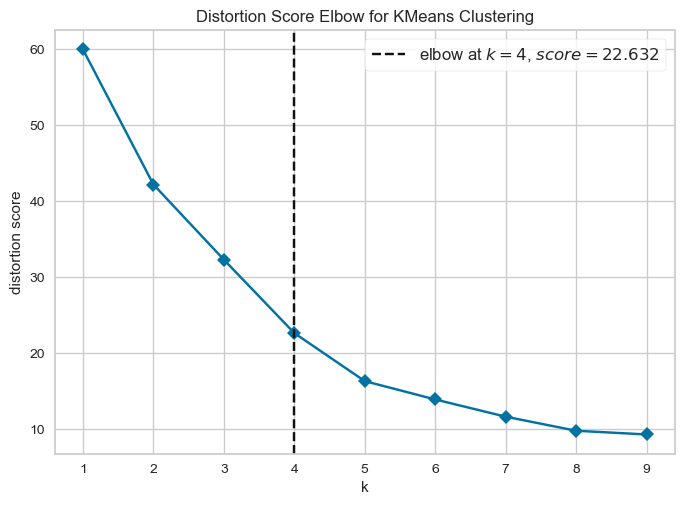

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [609]:
from yellowbrick.cluster import KElbowVisualizer

k=0
kmeans = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(kmeans, k=(1,10), timings=False)
visualizer.fit(df_scaled)
visualizer.show()

In [433]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(silhouette_avg)


0.4901445800225784


In [611]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=7).fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    print(f'cluster : {k} // silhouette index {silhouette_avg}')
    

cluster : 2 // silhouette index 0.31833859738371756
cluster : 3 // silhouette index 0.32496957689092026
cluster : 4 // silhouette index 0.39485948280763006
cluster : 5 // silhouette index 0.4531356092793267
cluster : 6 // silhouette index 0.4475938195723
cluster : 7 // silhouette index 0.4634955811112629
cluster : 8 // silhouette index 0.46231323208033387
cluster : 9 // silhouette index 0.45157456255727363


C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hbsss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

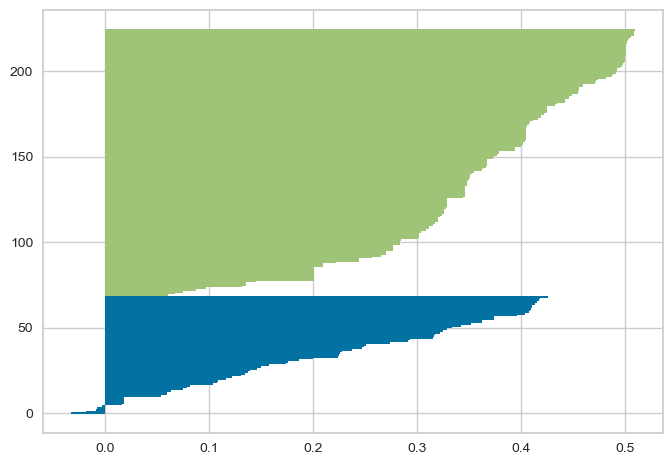

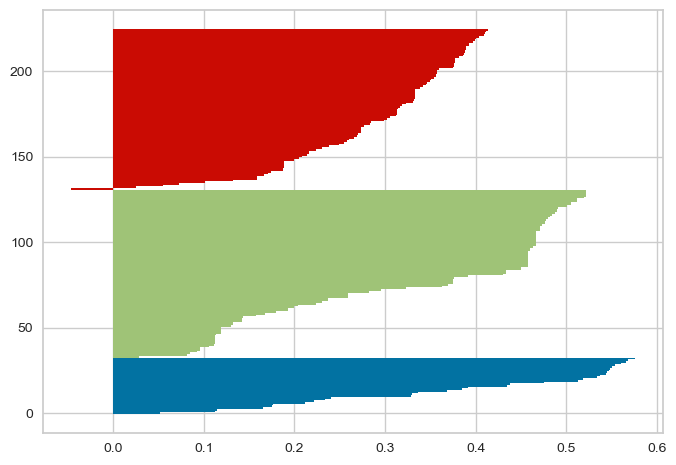

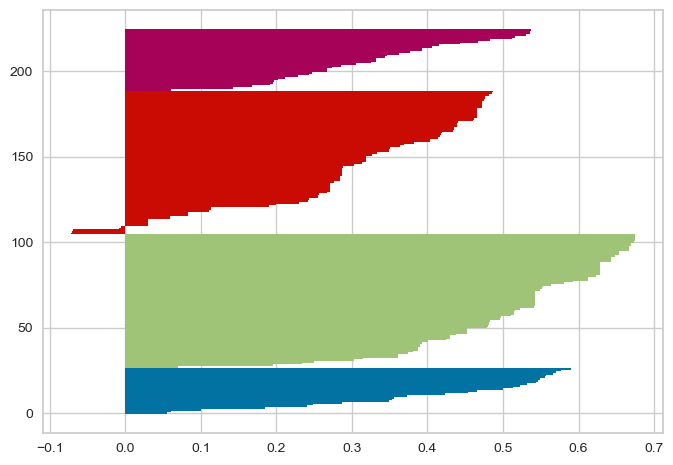

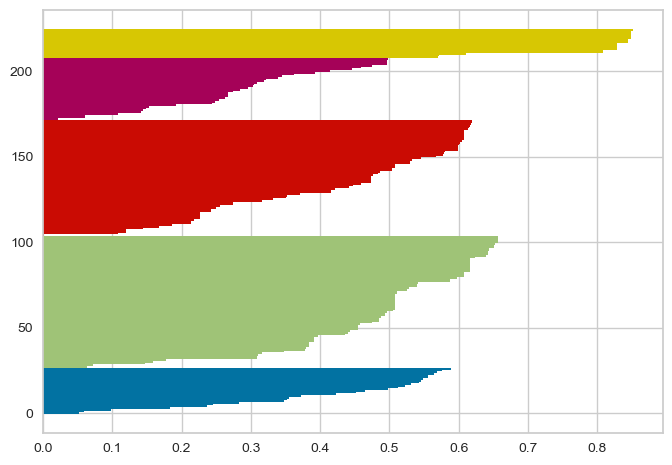

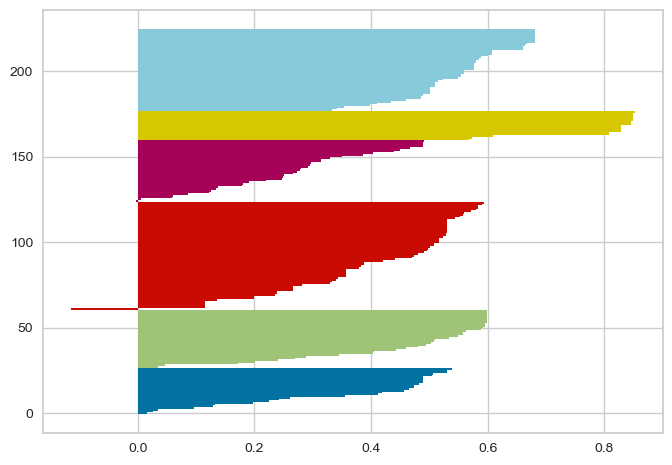

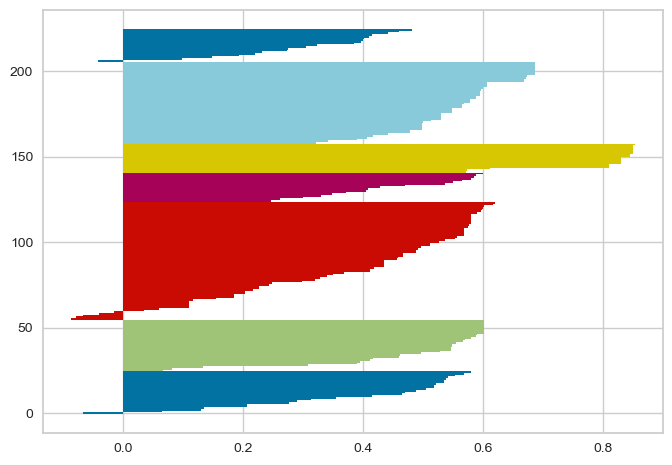

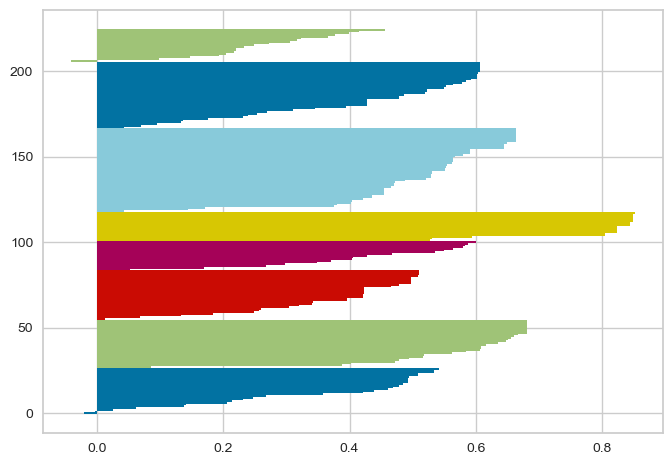

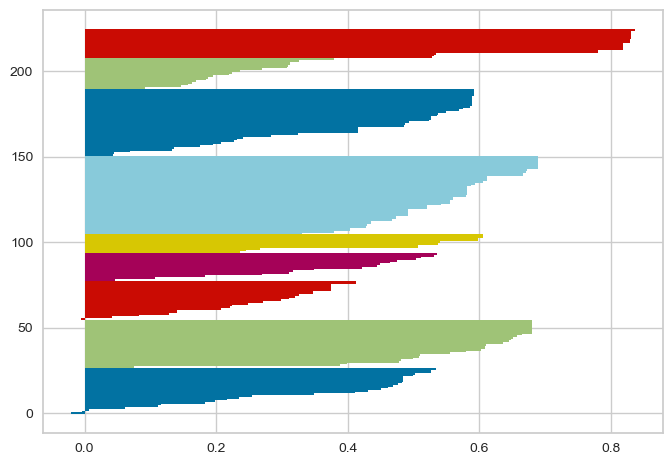

In [613]:
import matplotlib.pyplot as plt
import numpy as np
for k in range(2, 10):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=7).fit(df_scaled)
    silhouette_vals = silhouette_samples(df_scaled, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0
    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort() # numpy array는 sort 메소드를 이용하면 오름차순으로 정렬된 형태로 바뀜
        
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)
        

In [463]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


In [575]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(df_scaled.iloc[:,:-1])

df_pca = pca.transform(df_scaled.iloc[:,:-1])
df_pca = pd.DataFrame(df_pca, columns = ['component 0', 'component 1', 'component 2'])

df_pca

                      

,component 0,component 1,component 2
0,0.276037,-0.098239,0.094212
1,0.176435,-0.165234,0.219811
2,0.800093,0.285051,-0.211949
3,0.205662,-0.297283,0.130270
4,0.346606,-0.120386,0.120852
...,...,...,...
220,-0.439415,-0.078803,-0.100129
221,0.016427,0.445330,-0.555757
222,-0.459622,-0.077804,-0.112130
223,-0.459622,-0.077804,-0.112130


In [661]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(df_scaled.iloc[:,:-1])

df_pca = pca.transform(df_scaled.iloc[:,:-1])
df_pca = pd.DataFrame(df_pca, columns = ['component 0', 'component 1'])

df_pca

,component 0,component 1
0,0.270847,0.112692
1,0.168111,0.166123
2,0.834692,-0.242592
3,0.183158,0.304805
4,0.331325,0.158894
...,...,...
220,-0.467085,0.089138
221,0.059822,-0.455325
222,-0.448336,-0.001073
223,-0.448336,-0.001073


In [663]:
print(pca.explained_variance_ratio_)

[0.46523514 0.26943278]


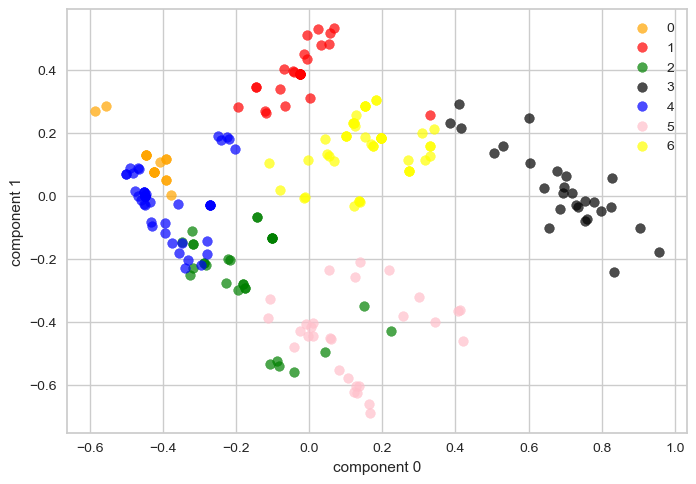

In [665]:
import matplotlib.pyplot as plt

df_pca['target'] = df_scaled['target']

df_pca_0 = df_pca[df_pca['target'] == 0]
df_pca_1 = df_pca[df_pca['target'] == 1]
df_pca_2 = df_pca[df_pca['target'] == 2]
df_pca_3 = df_pca[df_pca['target'] == 3]
df_pca_4 = df_pca[df_pca['target'] == 4]
df_pca_5 = df_pca[df_pca['target'] == 5]
df_pca_6 = df_pca[df_pca['target'] == 6]
df_pca_7 = df_pca[df_pca['target'] == 7]
df_pca_8 = df_pca[df_pca['target'] == 8]
df_pca_9 = df_pca[df_pca['target'] == 9]
df_pca_10 = df_pca[df_pca['target'] == 10]

# target 별 시각화
plt.scatter(df_pca_0['component 0'], df_pca_0['component 1'],  color = 'orange', alpha = 0.7, label = '0')
plt.scatter(df_pca_1['component 0'], df_pca_1['component 1'], color = 'red', alpha = 0.7, label = '1')
plt.scatter(df_pca_2['component 0'], df_pca_2['component 1'],color = 'green', alpha = 0.7, label = '2')
plt.scatter(df_pca_3['component 0'], df_pca_3['component 1'],  color = 'black', alpha = 0.7, label = '3')
plt.scatter(df_pca_4['component 0'], df_pca_4['component 1'],  color = 'blue', alpha = 0.7, label = '4')
plt.scatter(df_pca_5['component 0'], df_pca_5['component 1'], color = 'pink', alpha = 0.7, label = '5')
plt.scatter(df_pca_6['component 0'], df_pca_6['component 1'],  color = 'yellow', alpha = 0.7, label = '6')
#plt.scatter(df_pca_7['component 0'], df_pca_7['component 1'],  color = 'grey', alpha = 0.7, label = '7')
#plt.scatter(df_pca_7['component 0'], df_pca_7['component 1'],  color = 'cyan', alpha = 0.7, label = '8')
#plt.scatter(df_pca_7['component 0'], df_pca_7['component 1'],  color = 'tan', alpha = 0.7, label = '9')
#plt.scatter(df_pca_7['component 0'], df_pca_7['component 1'],  color = 'brown', alpha = 0.7, label = '10')





plt.xlabel('component 0')
plt.ylabel('component 1')

plt.legend()
plt.show()